# Homework 1

Austin Gill

Problems:

* 1.1, 1.8, 1.15
* 2.9, 2.10, 2.11, 2.29, 2.31
* Text Addition

---

## 1.1

How would you define a robot?

A robot is a machine; a mechanical device built to perform some complex task, often repeatedly, with the intent of replacing or amplifying human effort.

Now a few notes:

* I would argue that the *intent* of the device's use is important.
* I would argue that the definition of *complex* is key. This is what separates a washing machine and a toaster from an assembly line robot. What is "complex" is continually redefined as time progresses. In my opinion, in the 1800s, a washing machine *would* be considered a robot.

## 1.8
Do you think the *Robotic Appliance* and *Robotic Agent* partitioning is a more effective way to classify robots? Why or why not?

At the time being, yes, I think this is a more effective way to classify robots. This partitioning distinguishes the current cutting edge from the established and well-known. As time progresses, however, this distinction may become less and less important than some other, unknown as-of-yet, feature.

## 1.15

Work in robotics can replace people with machines. This results in job loss. Discuss the ethics of working in the robotics industry.

The same could have been said of the female "computers" of WWII and soon after. Or the Chinese railroad workers in the 1800s. Or for that matter, any force-multiplying technology.

I personally believe job loss caused by robotics to be (an ethical) non-issue. However, it does present very real challenges to be solved. Since humans have learned to bang rocks together, the amount of work to be done has never stopped increasing, and the type of work to be done has never stopped changing. (Sure, we've always needed to gather food, but the manner in which we do it has changed dramatically). I believe there will always be opportunity for work.

A utopian view might be that in the future, the entire workforce will be replaced by robotics, and no one will have to work. I think this is naive, and views "work" and the "workforce" to accomplish it as a static resource, one that isn't constantly growing and changing. I predict humans will wipe themselves out before an entirely robotic workforce is feasible.

## 2.9

![manipulator](twolinkalt2.svg)

Assume that you have a two link manipulator that is operating in the vertical plane $x$−$z$. Attach the base to a rotational joint so the arm rotates around the $z$ axis

* Find the position of the end effector as a function of joint angles.
* Find the inverse kinematic formula.


**Feedback:** The textbook is inconsistent with its use of $\theta_1$, $\theta_2$ and $Q_1$, $Q_2$. Please use diagrams that agree with your $\LaTeX$ or vice versa.

### Forward Kinematics

![x-z plane](x-z.png)

First, in the $x$-$z$ plane, find the $z$ coordinate of the manipulator end point

$$z = L_1 \sin Q_1 + L_2 \sin(Q_1 + Q_2)$$

Then the length of the manipulator in the $x$-$y$ plane is

$$L = L_1 \cos Q_1 + L_2 \cos(Q_1 + Q_2)$$

From which we can find

$$x = L \cos Q_3$$
$$y = L \sin Q_3$$

### Inverse Kinematics

Working in the $x$-$y$ plane first, it is easy to calculate $Q_3$ and $L$

![inverse](inverse2.svg)

$$L = \sqrt{x^2 + y^2}$$
$$Q_3 = \arctan{\frac{y}{x}}$$

Once $L$ has bee calculated, we then move into the $x$-$z$ plane and calculate $H$ and $\alpha + Q_1$

![inverse](inverse1.svg)

$$H = \sqrt{x^2 + y^2 + z^2}$$
$$\alpha + Q_1 = \arctan{\frac{z}{L}}$$

**Note:** $\alpha$ could be positive or negative (elbow up, elbow down)

Now use the law of cosines to calculate $\alpha$ and $\gamma$

$${L_2}^2 = {L_1}^2 + H^2 - 2L_1 H \cos \alpha$$
$$\alpha = \arccos{\left(\frac{{L_2}^2 - {L_1}^2 - H^2}{-2L_1 H}\right)}$$

$$H^2 = {L_2}^2 + {L_1}^2 - 2 L_1 L_2 \cos \gamma$$
$$\gamma = \arccos{\left(\frac{H^2 - {L_1}^2 - {L_2}^2}{-2 L_1 L_2}\right)}$$

But $\alpha + Q_1 = \arctan{\frac{z}{L}}$, so

$$Q_1 = \arctan{\frac{z}{L}} - \arccos{\frac{{L_2}^2 - {L_1}^2 - H^2}{-2L_1 H}}$$

and

$$Q_2 = \pi - \gamma$$

## 2.10

Assume that you have a two link manipulator with $a_1=15$cm and $a_2=15$cm and that the base of the manipulator is at the origin of the coordinate system. Write a Python program to take the list of workspace points and plug them into the inverse kinematics formulas for the two link manipulator. Plot these points on a graph where $\theta_1$ is the horizontal axis and $\theta_2$ is the vertical axis. You will have to adjust some aspects to get a good looking plot. (Scale factors etc.) Test your code on the workspace line
* $x+y=25$ for $x,y>0$ and
* $x=10\cos(t)+15, y=10\sin(t)$ for $0\leq t \leq \pi$.

The point here is to see what the configuration space curve looks like.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
a1 = 15
a2 = 15

def forward(q1, q2):
    """Forward kinematics for a configuration point"""
    x = a2 * np.cos(q1 + q2) + a1 * np.cos(q1)
    y = a2 * np.sin(q1 + q2) + a1 * np.sin(q1)

    return x, y

def inverse(x, y):
    """Inverse kinematics for a workspace point"""
    D = (x**2 + y**2 - a1**2 - a2**2) / (2 * a1 * a2)
    q2 = np.arctan2(np.sqrt(1 - D**2), D)
    q1 = np.arctan2(y, x) - np.arctan2(a2 * np.sin(q2), a1 + a2 * np.cos(q2))

    return q1, q2

In [3]:
x = np.arange(start=0, stop=25, step=0.1)
y = 25 - x

q1, q2 = inverse(x, y)
xx, yy = forward(q1, q2)
# Sanity check
assert np.allclose(x, xx)
assert np.allclose(y, yy)

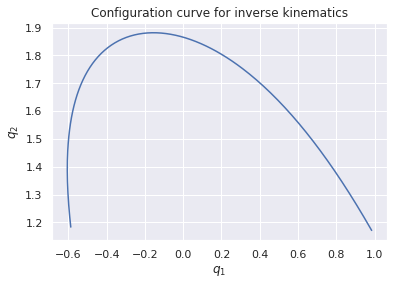

In [4]:
plt.plot(q1, q2)
plt.title('Configuration curve for inverse kinematics')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.show()

In [5]:
t = np.arange(start=0, stop=np.pi, step=0.1)
x = 10 * np.cos(t) + 15
y = 10 * np.sin(t)

q1, q2 = inverse(x, y)
xx, yy = forward(q1, q2)
# Sanity check
assert np.allclose(x, xx)
assert np.allclose(y, yy)

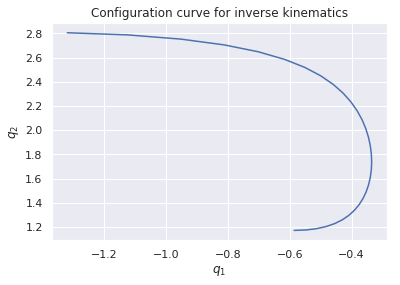

In [6]:
plt.plot(q1, q2)
plt.title('Configuration curve for inverse kinematics')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.show()

## 2.11

Assume that you have a two link manipulator with $a_1=15$cm and $a_2=15$cm and that the base of the manipulator is at the origin of the coordinate system. Write a two link manipulator location program (Python). This program will take a list of angles and compute the location of the end effector. Show how this program works with the list of angles you generated in the previous problem. If the angle inputs are generated by a square, the simulated robot arm’s end effector should trace a square. Plot the end effector points. You need to plot the input shape and the final shape to see if your code is correct. You will need to use the previous problem for this problem. Demonstrate your code to trace out the four segments which form the square with endpoints $(5,0)$, $(5, 15)$, $(20, 15)$, and $(20,0)$.

First, plot the curves for sanity. The forward kinematics were written as a part of the previous problem.

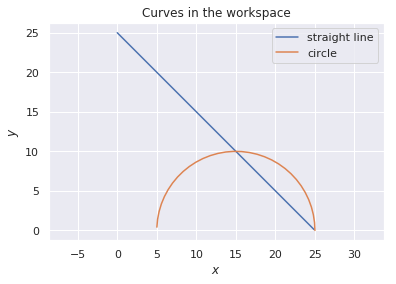

In [7]:
x = np.arange(start=0, stop=25, step=0.1)
y = 25 - x
plt.plot(x, y, label='straight line')


t = np.arange(start=0, stop=np.pi, step=0.1)
x = 10 * np.cos(t) + 15
y = 10 * np.sin(t)
plt.plot(x, y, label='circle')

plt.title('Curves in the workspace')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis('equal')
plt.show()

Recompute the workspace curves because I reused variables...

In [8]:
x1 = np.arange(start=0, stop=25, step=0.1)
y1 = 25 - x1
q1, w1 = inverse(x1, y1)

t = np.arange(start=0, stop=np.pi, step=0.1)
x2 = 10 * np.cos(t) + 15
y2 = 10 * np.sin(t)

q2, w2 = inverse(x2, y2)

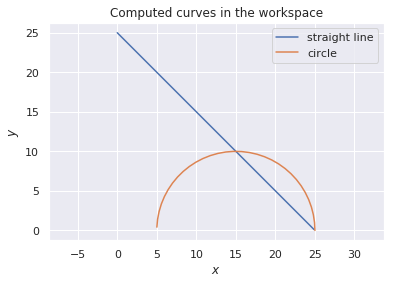

In [9]:
xx1, yy1 = forward(q1, w1)
assert np.allclose(x1, xx1)
assert np.allclose(y1, yy1)
plt.plot(xx1, yy1, label='straight line')

xx2, yy2 = forward(q2, w2)
assert np.allclose(x2, xx2)
assert np.allclose(y2, yy2)
plt.plot(xx2, yy2, label='circle')

plt.title('Computed curves in the workspace')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis('equal')
plt.show()

Hey! Look at that, they look the same!

In [10]:
# I couldn't think of a better way to generate points on a square...
N = 100
x = np.linspace(start=5, stop=20, num=N)
x = np.append(x, np.linspace(start=20, stop=20, num=N))
x = np.append(x, np.linspace(start=20, stop=5, num=N))
x = np.append(x, np.linspace(start=5, stop=5, num=N))

y = np.linspace(start=0, stop=0, num=N)
y = np.append(y, np.linspace(start=0, stop=15, num=N))
y = np.append(y, np.linspace(start=15, stop=15, num=N))
y = np.append(y, np.linspace(start=15, stop=0, num=N))

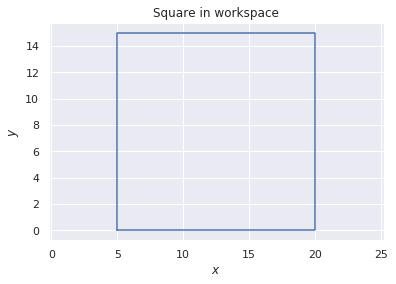

In [11]:
# Plot for sanity
plt.plot(x, y)
plt.title('Square in workspace')
plt.axis('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

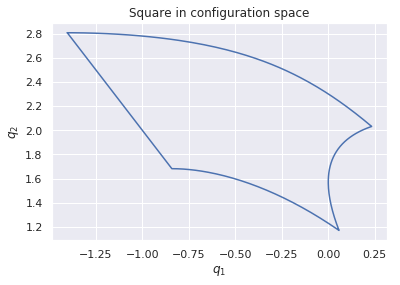

In [12]:
q1, q2 = inverse(x, y)
plt.plot(q1, q2)
plt.title('Square in configuration space')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.show()

I'm surprised one of the curves in configuration space is a straight line. I did not expect one of the sides of the square to have a constant ratio between $q_1$ and $q_2$ while it was being traced.

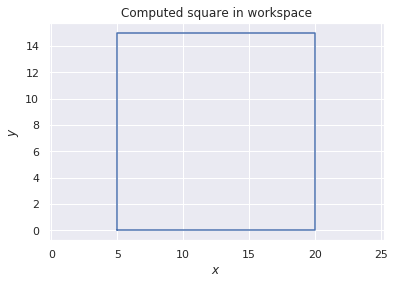

In [13]:
xx, yy = forward(q1, q2)

assert np.allclose(x, xx)
assert np.allclose(y, yy)

plt.plot(xx, yy)
plt.title('Computed square in workspace')
plt.axis('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

## 2.29

Given a differential drive robot starting from $(0,0,0)$ find the final position when wheel velocities are given by:

$t=0$ to $t=5$: $ω1= 2$, $ω2= 2$

$t=5$ to $t=6$: $ω1= 3$, $ω2= 4$

$t=6$ to $t=10$: $ω1= 1$, $ω2= 2$

where $D=10$, and $L=16$.

## 2.31

Show that the differential drive kinematic equations are non-holonomic constraints.

## Text Addition